# Exploratory Data Analysis (EDA) for Image Classification

In this notebook, we will perform exploratory data analysis on the CIFAR-10 dataset. Our goals include:
- Understanding the dataset structure and class distribution.
- Visualizing sample images from each class.
- Analyzing image dimensions, pixel values, and basic statistics.

Let's get started!


## Dataset Overview

The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class. The dataset is split into 50,000 training images and 10,000 test images.


In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For loading the CIFAR-10 dataset
from tensorflow.keras.datasets import cifar10

# For displaying images inline
%matplotlib inline

# Set plot style for better aesthetics
sns.set(style="whitegrid")


In [2]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Check the shapes of the training and test sets
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 187s 1us/step
Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


C:\Users\HP\AppData\Local\Temp\ipykernel_27548\1524750918.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax.set_title(class_names[int(y_train[i])])


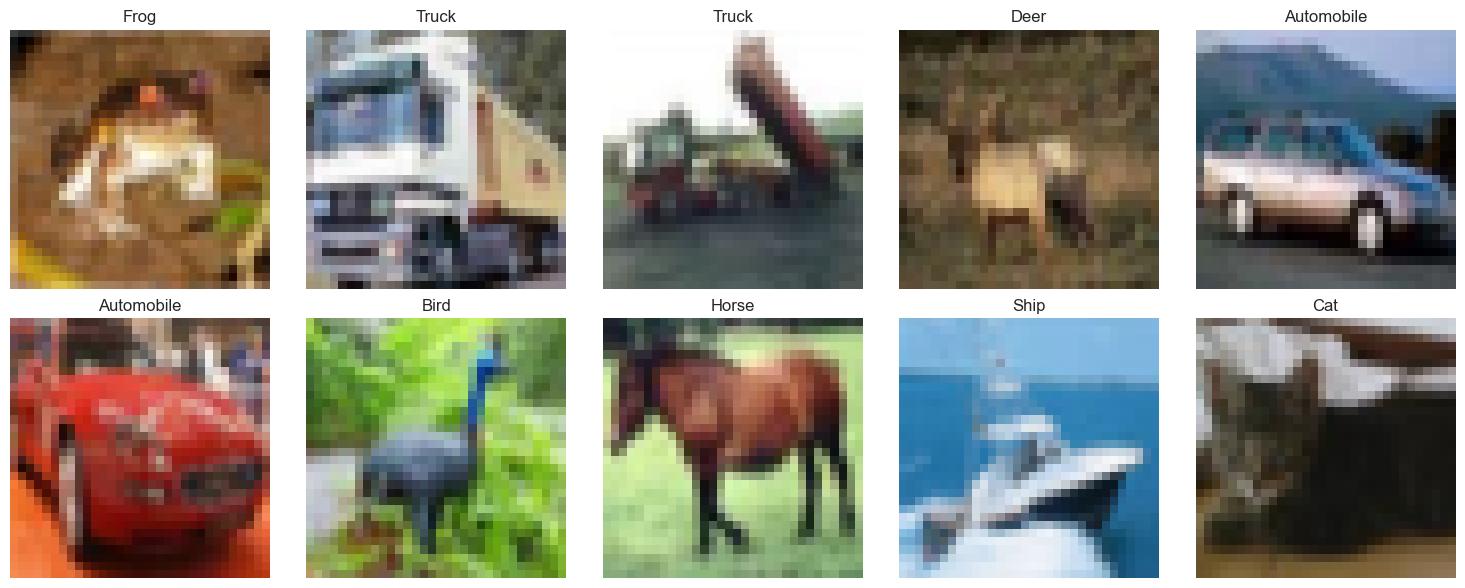

In [4]:
# Define class names for CIFAR-10
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Display a few sample images from the training set with their labels
fig, axes = plt.subplots(2, 5, figsize=(15,6))
axes = axes.flatten()

for i, ax in enumerate(axes):
    ax.imshow(x_train[i])
    ax.set_title(class_names[int(y_train[i])])
    ax.axis('off')

plt.tight_layout()
plt.show()


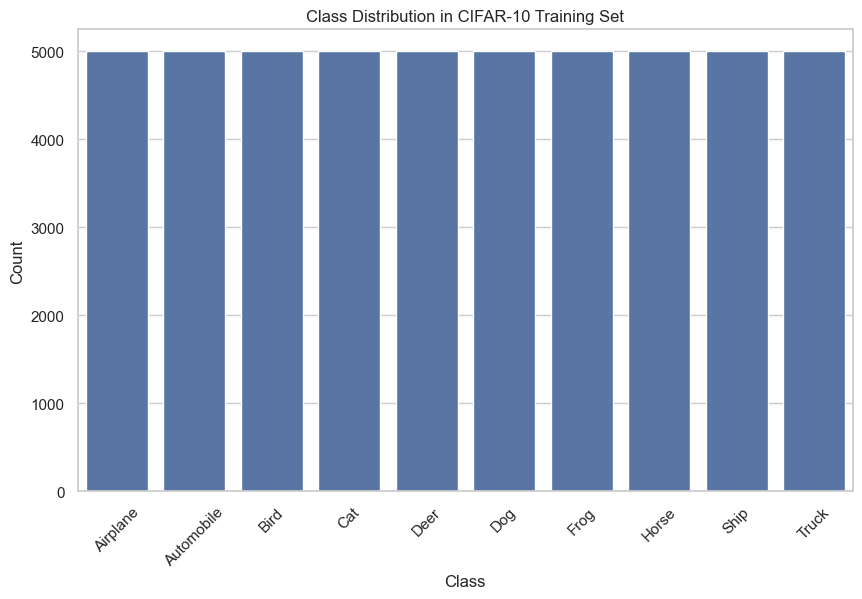

In [5]:
# Plotting the class distribution in the training set
import pandas as pd

# Flatten y_train array for easier handling
y_train_flat = y_train.flatten()
train_df = pd.DataFrame({'label': y_train_flat})
train_df['class'] = train_df['label'].apply(lambda x: class_names[x])

plt.figure(figsize=(10, 6))
sns.countplot(x='class', data=train_df, order=class_names)
plt.xticks(rotation=45)
plt.title('Class Distribution in CIFAR-10 Training Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


Image shape: (32, 32, 3)
Pixel value range: min = 0 , max = 255


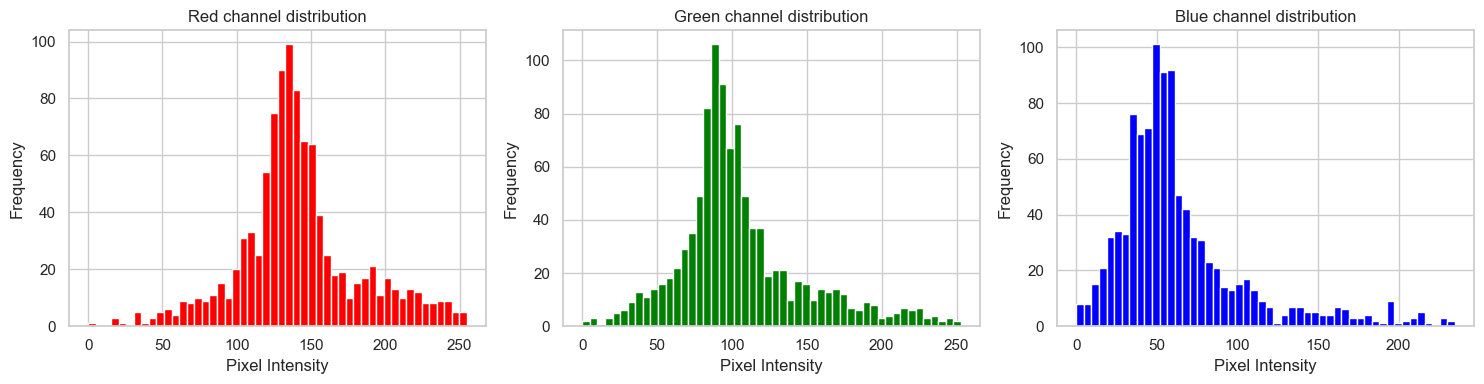

In [6]:
# Analyze image pixel statistics: Check pixel value distribution for a sample image
sample_img = x_train[0]
print("Image shape:", sample_img.shape)
print("Pixel value range: min =", sample_img.min(), ", max =", sample_img.max())

# Plot histogram of pixel values for each channel
channels = ['Red', 'Green', 'Blue']
plt.figure(figsize=(15, 4))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.hist(sample_img[:,:,i].ravel(), bins=50, color=channels[i].lower())
    plt.title(f'{channels[i]} channel distribution')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [7]:
# Check mean and standard deviation of pixel values for normalization reference
mean = np.mean(x_train, axis=(0,1,2)) / 255.0  # dividing by 255 for scale normalization
std = np.std(x_train, axis=(0,1,2)) / 255.0

print("Mean of pixel values (per channel):", mean)
print("Standard deviation of pixel values (per channel):", std)


Mean of pixel values (per channel): [0.49139968 0.48215841 0.44653091]
Standard deviation of pixel values (per channel): [0.24703223 0.24348513 0.26158784]


## Summary & Next Steps

- **Dataset Overview:** CIFAR-10 contains 10 classes with balanced distribution.
- **Visualizations:** Sample images and class distribution plots help in understanding the data.
- **Image Statistics:** Basic pixel statistics are computed, which will be useful for image normalization during preprocessing.

In the next steps, we will use this analysis to preprocess the data (resize, normalize, augment) before training our image classification model.
